In [167]:
import numpy as np
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

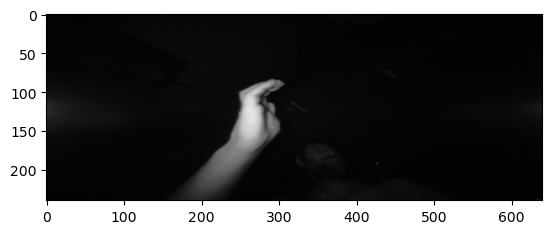

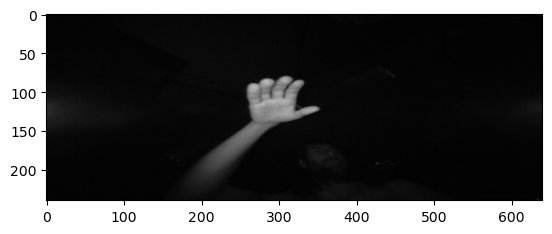

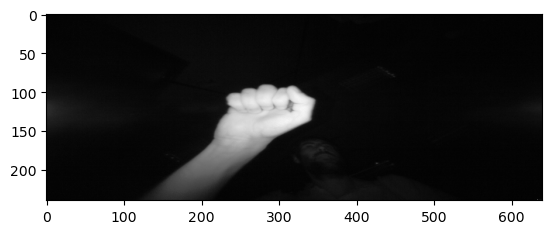

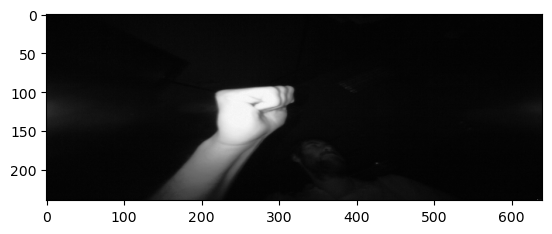

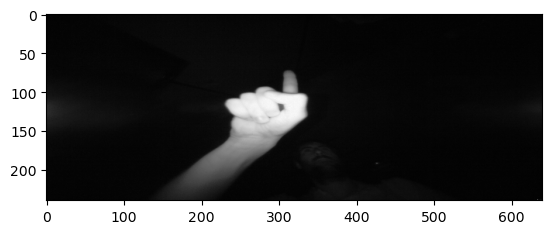

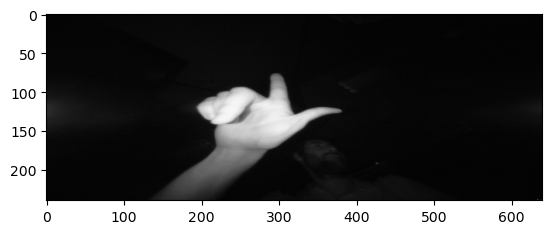

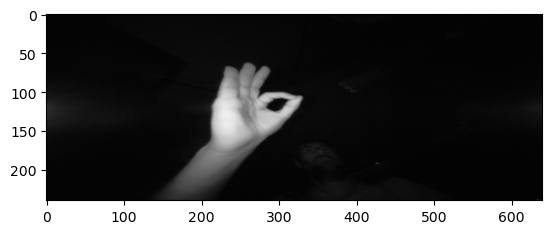

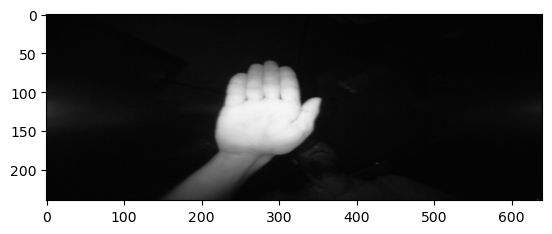

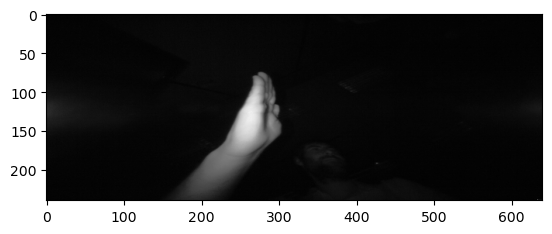

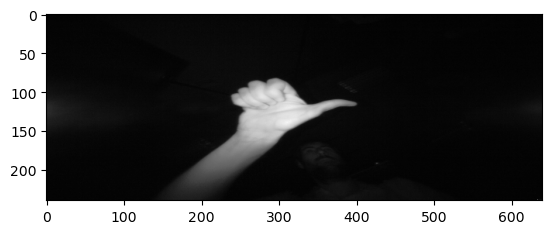

In [168]:
data_dir='training_data' # main folder
categories = ['c','down','fist','fist_moved','index','l','ok','palm','palm_moved','thumb']  # names of folders in training_set
for category in categories:
    Path = os.path.join(data_dir,category) # create path to dogs and cats =  training_set/cat/1.png
    x=0
    for img in os.listdir(Path): # iterate over each image per dogs and cats
        x+=1
        img_array = cv2.imread(os.path.join(Path,img))  # convert to array
        plt.imshow(img_array, cmap='gray') #graph it
        plt.show()
        if x==1:
            break

In [169]:
print(img_array)

[[[ 4  4  4]
  [ 5  5  5]
  [ 3  3  3]
  ...
  [ 4  4  4]
  [ 4  4  4]
  [ 2  2  2]]

 [[ 4  4  4]
  [ 5  5  5]
  [ 4  4  4]
  ...
  [ 2  2  2]
  [ 5  5  5]
  [ 3  3  3]]

 [[ 4  4  4]
  [ 5  5  5]
  [ 4  4  4]
  ...
  [ 3  3  3]
  [ 4  4  4]
  [ 4  4  4]]

 ...

 [[ 5  5  5]
  [ 6  6  6]
  [ 4  4  4]
  ...
  [ 5  5  5]
  [ 4  4  4]
  [ 4  4  4]]

 [[ 4  4  4]
  [ 3  3  3]
  [ 6  6  6]
  ...
  [ 4  4  4]
  [ 4  4  4]
  [ 4  4  4]]

 [[ 3  3  3]
  [ 4  4  4]
  [ 5  5  5]
  ...
  [25 25 25]
  [12 12 12]
  [16 16 16]]]


In [170]:
print(f'shape : {img_array.shape}')

shape : (240, 640, 3)


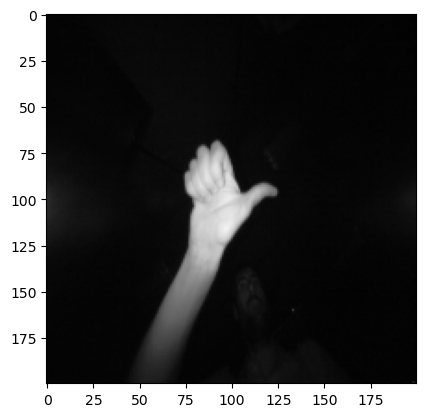

In [171]:
img_size = 200

new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array, cmap='gray')
plt.show()

In [172]:
training_data=[]

def create_training_data():
    for category in categories:

        Path = os.path.join(data_dir, category)
        class_num = categories.index(category)

        for img in tqdm(os.listdir(Path)):

            img_array= cv2.imread(os.path.join(Path,img))
            new_array= cv2.resize(img_array, (img_size, img_size))
            training_data.append([new_array, class_num])


create_training_data()

100%|██████████| 200/200 [00:00<00:00, 254.51it/s]


In [173]:
print(training_data[:5])

[[array([[[ 3,  3,  3],
        [ 3,  3,  3],
        [ 4,  4,  4],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 2,  2,  2]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 4,  4,  4]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       ...,

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [ 4,  4,  4],
        [ 3,  3,  3],
        [ 4,  4,  4]],

       [[ 3,  3,  3],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5],
        ...,
        [ 4,  4,  4],
        [42, 42, 42],
        [12, 12, 12]]], dtype=uint8), 0], [array([[[ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
     

In [174]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

8
2
4
9
0
6
0
7
6
2


In [175]:
img_size = 200

x = []
y = []

for label, folder in enumerate(os.listdir(data_dir)):
    folder_path = os.path.join(data_dir, folder)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)   
        img = cv2.resize(img, (img_size, img_size))      
        x.append(img)
        y.append(label)

x = np.array(x).reshape(-1, img_size, img_size, 1) 
y = np.array(y)

x = x.astype('float32') / 255.0

print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")


x shape: (2000, 200, 200, 1)
y shape: (2000,)


In [176]:
x[:1]

array([[[[0.01176471],
         [0.01176471],
         [0.01568628],
         ...,
         [0.01568628],
         [0.01176471],
         [0.00784314]],

        [[0.01568628],
         [0.01568628],
         [0.01568628],
         ...,
         [0.01176471],
         [0.01176471],
         [0.01568628]],

        [[0.01568628],
         [0.01568628],
         [0.01568628],
         ...,
         [0.01176471],
         [0.01176471],
         [0.01176471]],

        ...,

        [[0.01568628],
         [0.01568628],
         [0.01568628],
         ...,
         [0.01568628],
         [0.01176471],
         [0.01568628]],

        [[0.01176471],
         [0.01568628],
         [0.01960784],
         ...,
         [0.01568628],
         [0.01568628],
         [0.01568628]],

        [[0.01568628],
         [0.01960784],
         [0.01960784],
         ...,
         [0.01568628],
         [0.16470589],
         [0.04705882]]]], dtype=float32)

In [177]:
y[:1]

array([0])

In [178]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8,random_state=1234)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 200, 200, 1)
(400, 200, 200, 1)
(1600,)
(400,)


In [179]:
import tensorflow as tf
from tensorflow import keras

Keras_Model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='VALID',
                        input_shape=(img_size, img_size, 1)),  
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(filters=32, kernel_size=(4, 4), strides=(1, 1), padding='VALID'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    keras.layers.BatchNormalization(),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(10, activation=tf.nn.softmax)  
])

Keras_Model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  
    metrics=['accuracy']
)

Keras_Model.summary()


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)              │ (None, 198, 198, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 99, 99, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 96, 96, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │     9,437,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,455,594 (36.07 MB)

 Trainable params: 9,455,466 (36.07 MB)

 Non-trainable params: 128 (512.00 B)

In [180]:
Keras_Model.fit(x_train, y_train, epochs=6, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=1)])

Epoch 1/6
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 694ms/step - accuracy: 0.5522 - loss: 5.8266
Epoch 2/6
50/50 ━━━━━━━━━━━━━━━━━━━━ 35s 692ms/step - accuracy: 0.9833 - loss: 0.0557
Epoch 3/6
50/50 ━━━━━━━━━━━━━━━━━━━━ 35s 700ms/step - accuracy: 0.9917 - loss: 0.0288
Epoch 4/6
50/50 ━━━━━━━━━━━━━━━━━━━━ 35s 692ms/step - accuracy: 0.9849 - loss: 0.0552
Epoch 5/6
50/50 ━━━━━━━━━━━━━━━━━━━━ 35s 691ms/step - accuracy: 0.9979 - loss: 0.0134
Epoch 6/6
50/50 ━━━━━━━━━━━━━━━━━━━━ 35s 704ms/step - accuracy: 0.9882 - loss: 0.0221


In [198]:
from keras.models import load_model

KerasModel.save('cnn_hand_model.h5')
print("Model saved successfully!")

Model saved successfully!


In [200]:
loaded_model = load_model('cnn_hand_model.h5')